# Exercise 4: Various Kernels
Use the dataset dist.csv, which is a small constructed toy set, it is visualized in Figure 4. The data is
Gaussian mixture data, so there is a well-defined true decision bound. For x ∈ [-6, 10], this is approximated
by

```math
d(x) =
\begin{cases} 
0.5 \left( 18 - 2x - \sqrt{-724 + 256x - 16x^2} \right), & \text{if } x > 3.94 \\
0.071 \left( 174 - 22x - \sqrt{23123 - 6144x + 288x^2} \right), & \text{otherwise.}
\end{cases}
```

Hyperparameters to tune:
- Linear Kernel: C
- RBF Kernel: C, gamma
- Polynomial Kernel: C, d, gamma (optional)

## Preparation
Run the cell below to import and prepare datasets

In [2]:
import pandas as pd

train_data = pd.read_csv('./../resources/datasets/dist.csv', header=None, delimiter=';')
val_data = pd.read_csv('./../resources/datasets/dist_val.csv', header=None, delimiter=';')

X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_val, y_val = val_data.iloc[:, :-1], val_data.iloc[:, -1]

## Part 1: Tune Hyperparameters

This notebook performs a grid search on all the hyperparameters listed in Table 1 in two iterations.  
In the first iteration, we identify the best combination of hyperparameters by testing values in powers of 10.  
In the second iteration, we fine-tune the hyperparameters further by exploring the values close to the initial best combinations.  
5-fold cross validation is used during the training process and the trained model is then validated on dist_val.csv validation set.  

Run the cell below to define the grid search function.

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

def grid_search(kernel_type, params):
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1945)

    svc = SVC(kernel=kernel_type)

    # Note: On Windows, verbose output is only functional with n_jobs=1
    # Use n_jobs=1 for debugging (single core) and n_jobs=-1 for full performance (all cores).
    grid_search = GridSearchCV(svc, params, scoring='f1', cv=stratified_kfold, return_train_score=True, verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best parameters for {kernel_type} kernel: {best_params}")
    print(f"Best F1 score for {kernel_type} kernel: {best_score:.4f}\n")

### Iteration 1

This cell took ~15 minutes to complete

In [27]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [0.001, 0.01, 0.1, 1]
degree_values = [2, 3, 4]

param_grid = {
    'linear': {'C': C_values},
    'rbf': {'C': C_values, 'gamma': gamma_values},
    'poly': {'C': C_values, 'degree': degree_values, 'gamma': gamma_values}
}

for kernel_type, params in param_grid.items():
    grid_search(kernel_type, params)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters for linear kernel: {'C': 0.1}
Best F1 score for linear kernel: 0.8689

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters for rbf kernel: {'C': 1, 'gamma': 0.1}
Best F1 score for rbf kernel: 0.9084

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameters for poly kernel: {'C': 1000, 'degree': 3, 'gamma': 1}
Best F1 score for poly kernel: 0.9265



**Best Hyperparameters After Iteration 1**

Linear Kernel
- **C**: 0.1
- **F1 Score**: 0.8689
 
RBF Kernel
- **C**: 1
- **Gamma**: 0.1
- **F1 Score**: 0.9084
 
Polynomial Kernel
- **C**: 1000
- **Gamma**: 1
- **Degree**: 3
- **F1 Score**: 0.9265


### Iteration 2
This cell took ~4 hours to complete

In [28]:
param_grid = {
    'linear': {
        'C': [0.0125, 0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8]
    },
    'rbf': {
        'C': [0.125, 0.25, 0.5, 0.75, 1, 2, 3, 4, 6, 8],
        'gamma': [0.0125, 0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8]
    },
    'poly': {
        'C': [500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000],
        'degree': [3], 
        'gamma': [0.125, 0.25, 0.5, 0.75, 1, 2, 3, 4, 6, 8],
    }
}

for kernel_type, params in param_grid.items():
    grid_search(kernel_type, params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for linear kernel: {'C': 0.075}
Best F1 score for linear kernel: 0.8689

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for rbf kernel: {'C': 1, 'gamma': 0.025}
Best F1 score for rbf kernel: 0.9152

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for poly kernel: {'C': 1500, 'degree': 3, 'gamma': 1}
Best F1 score for poly kernel: 0.9280



**Best Hyperparameters After Iteration 2**

Linear Kernel
- **C**: 0.075
- **F1 Score**: 0.8689 (+0%)
 
RBF Kernel
- **C**: 1
- **Gamma**: 0.025
- **F1 Score**: 0.9152 (+0.75% in abs, +3.69% in log odds)
 
Polynomial Kernel
- **C**: 1500
- **Gamma**: 1
- **Degree**: 3
- **F1 Score**: 0.928 (+0.16% in abs, +0.88% in log odds)

### Validation
Run the cell below to train and validate models with the best hyperparameters from both iterations

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

iteration_1_params = {
    'linear': {'C': 0.1},
    'rbf': {'C': 1, 'gamma': 0.1},
    'poly': {'C': 1000, 'gamma': 1, 'degree': 3}
}

iteration_2_params = {
    'linear': {'C': 0.075},
    'rbf': {'C': 1, 'gamma': 0.025},
    'poly': {'C': 1500, 'gamma': 1, 'degree': 3}
}

def train_models(params, X_train, y_train):
    models = {}
    for kernel, param in params.items():
        if kernel == 'linear':
            model = SVC(C=param['C'], kernel=kernel)
        elif kernel == 'rbf':
            model = SVC(C=param['C'], gamma=param['gamma'], kernel=kernel)
        elif kernel == 'poly':
            model = SVC(C=param['C'], gamma=param['gamma'], degree=param['degree'], kernel=kernel)
        model.fit(X_train, y_train)
        models[kernel] = model
    return models

models_iteration_1 = train_models(iteration_1_params, X_train, y_train)
models_iteration_2 = train_models(iteration_2_params, X_train, y_train)

def validate_models(models, X_val, y_val):
    f1_scores = {}
    for kernel, model in models.items():
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores[kernel] = f1
    return f1_scores

f1_scores_iteration_1 = validate_models(models_iteration_1, X_val, y_val)
f1_scores_iteration_2 = validate_models(models_iteration_2, X_val, y_val)

Run the cell below to display statistics

In [41]:
def calculate_percentage_change(f1_scores_1, f1_scores_2):
    def compute_log_odds(f1_score):
        return np.log(f1_score / (1 - f1_score))
    
    percentage_changes = {}
    for kernel, f1_1 in f1_scores_1.items():
        f1_2 = f1_scores_2[kernel]
        abs_change = (f1_2 - f1_1) * 100
        log_odds_change = (compute_log_odds(f1_2) - compute_log_odds(f1_1)) * 100
        percentage_changes[kernel] = {
            'absolute': abs_change,
            'log_odds': log_odds_change
        }
    return percentage_changes

def format_scores(scores):
    return {k: float(v) for k, v in scores.items()}

def format_changes(changes):
    return {k: {metric: float(value) for metric, value in v.items()} for k, v in changes.items()}

percentage_changes = calculate_percentage_change(f1_scores_iteration_1, f1_scores_iteration_2)
formatted_f1_scores_1 = format_scores(f1_scores_iteration_1)
formatted_f1_scores_2 = format_scores(f1_scores_iteration_2)
formatted_percentage_changes = format_changes(percentage_changes)

for kernel, f1_score_1 in formatted_f1_scores_1.items():
    f1_score_2 = formatted_f1_scores_2[kernel]
    changes = formatted_percentage_changes[kernel]
    print(f"=== {kernel} Kernel ===")
    print(f"F1 score on iteration 1 best hyperparameters: {f1_score_1:.4f}")
    print(f"F1 score on iteration 2 best hyperparameters: {f1_score_2:.4f}")
    print(f"Change (absolute): {changes['absolute']:.4f}%")
    print(f"Change (log odds): {changes['log_odds']:.4f}%\n")

=== linear Kernel ===
F1 score on iteration 1 best hyperparameters: 0.8738
F1 score on iteration 2 best hyperparameters: 0.8727
Change (absolute): -0.1093%
Change (log odds): -0.9872%

=== rbf Kernel ===
F1 score on iteration 1 best hyperparameters: 0.9051
F1 score on iteration 2 best hyperparameters: 0.8983
Change (absolute): -0.6757%
Change (log odds): -7.6248%

=== poly Kernel ===
F1 score on iteration 1 best hyperparameters: 0.8987
F1 score on iteration 2 best hyperparameters: 0.8973
Change (absolute): -0.1375%
Change (log odds): -1.5010%



### Discussion
After validating the trained models on the validation dataset, it was observed that the second iteration of hyperparameter tuning resulted in a decrease in F1 scores for all kernels. These results suggest that the models may have overfitted to the training data during the second iteration, and the initial set of hyperparameters might have been closer to optimal. This indicates that the models have likely reached a point of convergence where further adjustments to hyperparameters do not yield significant improvements and may even degrade performance.

## Part 2: Plots

The cell below plots the decision boundaries of the best models for each kernel, along with the data and the true decision boundary.

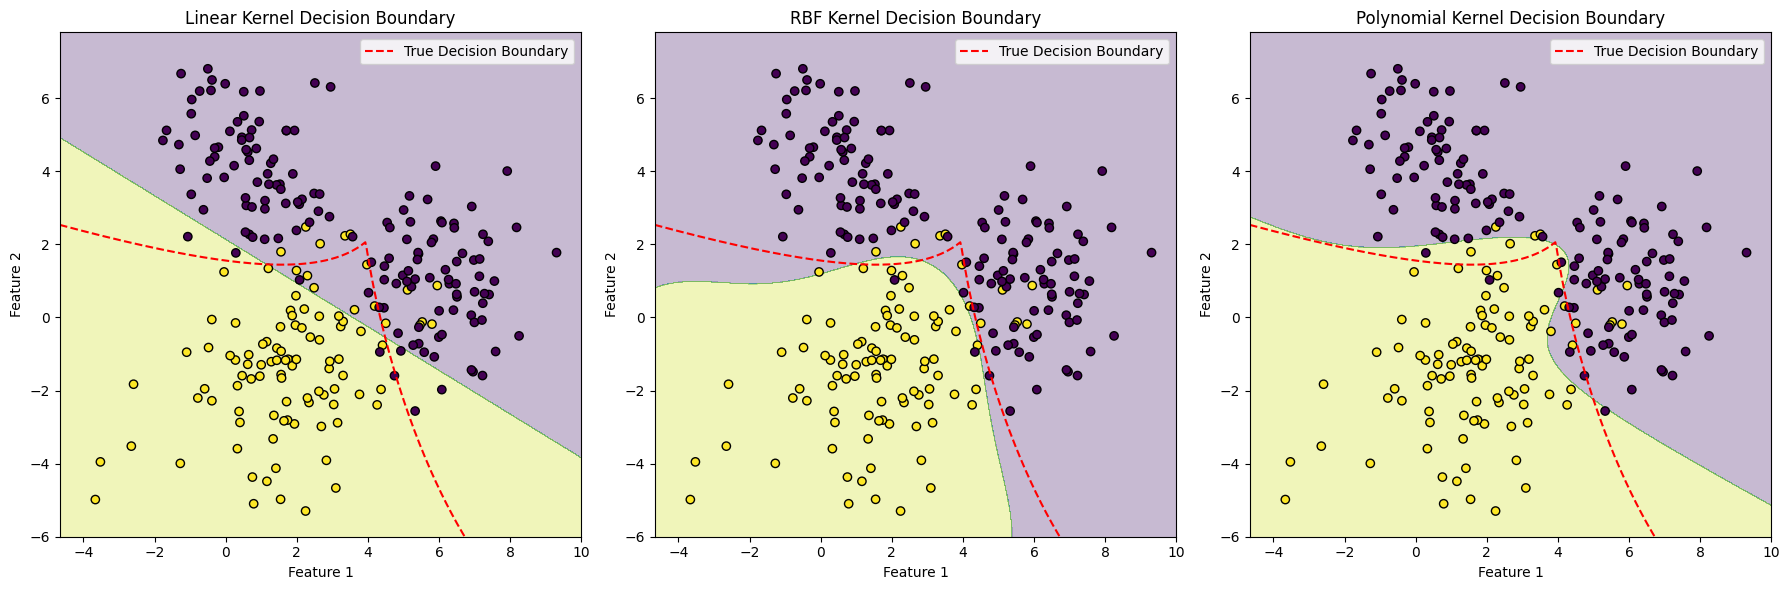

In [42]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

linear_model = SVC(C=0.1, kernel='linear')
rbf_model = SVC(C=1, gamma=0.1, kernel='rbf')
poly_model = SVC(C=1000, gamma=1, degree=3, kernel='poly')

linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)

def true_decision_boundary(x):
    # Use np.clip to ensure the values inside the sqrt are non-negative
    sqrt_term1 = np.sqrt(np.clip(-724 + 256 * x - 16 * x**2, 0, None))
    sqrt_term2 = np.sqrt(np.clip(23123 - 6144 * x + 288 * x**2, 0, None))
    return np.where(
        x > 3.94,
        0.5 * (18 - 2 * x - sqrt_term1),
        0.071 * (174 - 22 * x - sqrt_term2)
    )

x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

models = {
    'Linear Kernel': linear_model,
    'RBF Kernel': rbf_model,
    'Polynomial Kernel': poly_model
}

plt.figure(figsize=(18, 6))

x_values = np.linspace(x_min, x_max, 400)
y_values = true_decision_boundary(x_values)

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', marker='o')
    plt.plot(x_values, y_values, 'r--', label='True Decision Boundary')
    plt.title(f'{name} Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(right=10)
    plt.ylim(bottom=-6)
    plt.legend()

plt.tight_layout()
plt.show()
